# Mass loss with time
Generating Fig. 1 of paper

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from orbit import *
import json
import os

## Testing different tidal radius definitions

In [233]:
def compute_tidal_radius(s=2.,pmmag=0.25,ca=1.,vlos_e=vlos):
#     simprops = generate_simproperties(SegregationParameter=s, propermotionmag=pmmag, flattening=ca,
#                                  Nparticles=4e5,output_file=False)
    eq = crater2_eq()
    solar_reflex = crater2_solarreflex()
    pm = np.array([pmmag,0.])+solar_reflex
    Eq = np.array([eq[0],eq[1],distance,vlos_e,pm[0],pm[1]])

    R,T = integrate_orbits_backwards(Eq)
    OmP = OmegaP(R,T)
    OmA = OmegaA(R,T)
    rp = pericentre(R)
    print d2Potdr2(rp),d2Potdr2_full(pericentre_full(R)[:3])
    ra = apocentre(R)
    pot2 = d2Potdr2(rp)
    gamma = dlnMdlnr(rp)-1.
    pot2a = d2Potdr2(ra)
    gammaa = dlnMdlnr(ra)-1.
    print rp,ra
    print tidal_radius(rp, rs=1.45, c = 20., Delta=101.1,gamma=None,Omega=OmP)
    print tidal_radius(rp, rs=1.45, c = 20., Delta=101.1,gamma=gamma)
    print tidal_radius(rp, rs=1.45, c = 20., Delta=101.1,gamma=gamma+1.)
    print tidal_radius(ra, rs=1.45, c = 20., Delta=101.1,gamma=None,Omega=OmA)
    print tidal_radius(ra, rs=1.45, c = 20., Delta=101.1,gamma=gammaa)
    print tidal_radius(ra, rs=1.45, c = 20., Delta=101.1,gamma=gammaa+1.)
    
def compare_tidal_radius(s=2.,pmmag=0.25,ca=1.,vlos_e=vlos):
#     simprops = generate_simproperties(SegregationParameter=s, propermotionmag=pmmag, flattening=ca,
#                                  Nparticles=4e5,output_file=False)
    eq = crater2_eq()
    solar_reflex = crater2_solarreflex()
    pm = np.array([pmmag,0.])+solar_reflex
    Eq = np.array([eq[0],eq[1],distance,vlos_e,pm[0],pm[1]])

    R,T = integrate_orbits_backwards(Eq)
    OmP = OmegaP(R,T)
    rp = pericentre(R)
    ra = apocentre(R)
    pot2 = d2Potdr2(rp)
    gamma = dlnMdlnr(rp)-1.
    return gamma,rp,pot2,OmP**2,Minsider(rp),(ra-rp)/(ra+rp)
    print tidal_radius(rp, rs=1.45, c = 20., Delta=101.1,gamma=None,Omega=OmP)
    print tidal_radius(rp, rs=1.45, c = 20., Delta=101.1,gamma=gamma)
    print tidal_radius(rp, rs=1.45, c = 20., Delta=101.1,gamma=gamma+1.)
    print tidal_radius(rp, rs=1.45, c = 20., Delta=101.1,gamma=-5.)
    print tidal_radius(rp, rs=1.45, c = 20., Delta=101.1,gamma=0.)
    print tidal_radius(rp, rs=1.45, c = 20., Delta=101.1,gamma=1.)

In [235]:
compute_tidal_radius(pmmag=0.01,vlos_e=vlos)

-8400.951220189872 -14670.399347311304
1.3716551571147118 129.03261657424628
0.0708626200509
0.024720304828
0.0720585009423
10.6451066846
8.45452412367
10.6457071626


In [236]:
print mass_profile(0.05, 1.45, c=20, Delta=101.1)/mass_profile(10.65, 1.45, c=20, Delta=101.1)
print mass_profile(0.05, 1.45, c=20, Delta=101.1)/849845384.9357362
print mass_profile(2.2, 1.45, c=20, Delta=101.1)/849845384.9357362
print mass_profile(2.7, 1.45, c=20, Delta=101.1)/849845384.9357362
print mass_profile(3.7, 1.45, c=20, Delta=101.1)/849845384.9357362
print mass_profile(8.7, 1.45, c=20, Delta=101.1)/849845384.9357362
print mass_profile(7.6, 1.45, c=20, Delta=101.1)/849845384.9357362
print mass_profile(9.7, 1.45, c=20, Delta=101.1)/849845384.9357362

0.0004576955692790094
0.00042111203769595423
0.23746920002239774
0.2971422164262715
0.40685917747117106
0.8068958333504372
0.7347524533367066
0.8670394614109742


## WD expression
Compare WD expression for Omega^2 with true. Also check when $(2-\gamma)$ and $(1-\gamma)$ are good estimates for tidal radius factor. This family of orbits is not consistent with Crater II.

In [173]:
pmu = np.linspace(0.0,0.46,200)
c = np.array([compare_tidal_radius(pmmag=mu,vlos_e=vlos*2.) for mu in pmu])

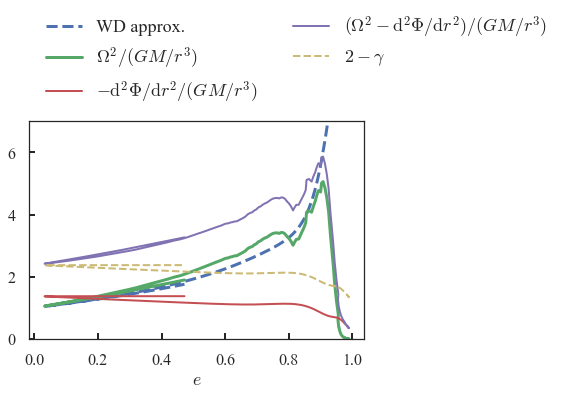

In [189]:
# plt.plot(c.T[-1],-c.T[2]/c.T[3]);plt.semilogy()
# plt.plot(c.T[-1],G*c.T[-2]/c.T[1]**3*(1.+c.T[-1]))
gmR = G*c.T[-2]/c.T[1]**3
plt.plot(c.T[-1],(1.+c.T[-1])*(1.-c.T[-1])**(1-np.sqrt(2.+c.T[0])),lw=3,label='WD approx.',ls='dashed')
plt.plot(c.T[-1],c.T[3]/gmR,lw=3,label=r'$\Omega^2/(GM/r^3)$')
plt.plot(c.T[-1],-c.T[2]/gmR,label='$-\mathrm{d}^2\Phi/\mathrm{d}r^2/(GM/r^3)$')
plt.plot(c.T[-1],(c.T[3]-c.T[2])/gmR,label=r'$(\Omega^2-\mathrm{d}^2\Phi/\mathrm{d}r^2)/(GM/r^3)$')
plt.plot(c.T[-1],2.-c.T[0],label=r'$2-\gamma$',ls='dashed')
# plt.plot(c.T[-1],1.-c.T[0])
# plt.semilogy()
plt.ylim(0.,7.)
plt.xlabel(r'$e$')
plt.ylabel('')
plt.legend(loc='lower left',ncol=2,bbox_to_anchor=(0.,1.))
plt.savefig('tidal_properties_with_ecc.pdf',bbox_inches='tight')

In [310]:
pmu2 = np.linspace(0.0,0.46,200)
c2 = np.array([compare_tidal_radius(pmmag=mu,vlos_e=vlos) for mu in pmu])

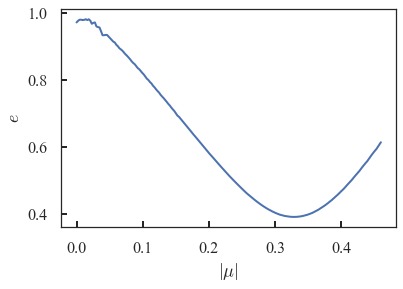

In [313]:
plt.plot(pmu2,c2.T[-1])
plt.ylabel(r'$e$')
plt.xlabel(r'$|\mu|$')

## Mass loss profiles

In [3]:
from run_2comp_cluster_vmaxuniversal import generate_simproperties

def apocentre_times(s=2.,pmmag=0.25,ca=1.):
    simprops = generate_simproperties(SegregationParameter=s, propermotionmag=pmmag, flattening=ca,
                                 Nparticles=4e5,output_file=False)
    eq = crater2_eq()
    solar_reflex = crater2_solarreflex()
    pm = np.array([pmmag,0.])+solar_reflex
    Eq = np.array([eq[0],eq[1],distance,vlos,pm[0],pm[1]])

    R,T = integrate_orbits_backwards(Eq)
    return apo_times(R,T)


def pericentre_times(s=2.,pmmag=0.25,ca=1.):
    simprops = generate_simproperties(SegregationParameter=s, propermotionmag=pmmag, flattening=ca,
                                 Nparticles=4e5,output_file=False)
    eq = crater2_eq()
    solar_reflex = crater2_solarreflex()
    pm = np.array([pmmag,0.])+solar_reflex
    Eq = np.array([eq[0],eq[1],distance,vlos,pm[0],pm[1]])

    R,T = integrate_orbits_backwards(Eq)
    return peri_times(R,T)

def apo_peri_ratio(s=2.,pmmag=0.25,ca=1.):
    simprops = generate_simproperties(SegregationParameter=s, propermotionmag=pmmag, flattening=ca,
                                 Nparticles=4e5,output_file=False)
    eq = crater2_eq()
    solar_reflex = crater2_solarreflex()
    pm = np.array([pmmag,0.])+solar_reflex
    Eq = np.array([eq[0],eq[1],distance,vlos,pm[0],pm[1]])

    R,T = integrate_orbits_backwards(Eq)
    return apocentre(R)/pericentre(R)

def single_mass_loss_hayashi(pmmag=0.25, rs_nfw=1.45, c = 20., Delta=101.1, s=2., centrifugal=True):
    eq = crater2_eq()
    solar_reflex = crater2_solarreflex()
    pm = np.array([pmmag,0.])+solar_reflex
    Eq = np.array([eq[0],eq[1],distance,vlos,pm[0],pm[1]])
    
    nperi = 1
    R,T = integrate_orbits_backwards(Eq)
    gamma = [dlnMdlnr(pericentre(R))-1.*centrifugal,dlnMdlnr(apocentre(R))-1.*centrifugal]
    return np.power(mass_loss_hayashi(pericentre(R),apocentre(R),nperi,rs_nfw,c=c,Delta=Delta,
                                      rlim=0.03*rs_nfw,rtotal=rs_nfw/s,gamma=gamma),1./nperi)

def plot_total_mass_loss(s=2.,pmmag=0.25,ca=1.):
    simprops = generate_simproperties(SegregationParameter=s, propermotionmag=pmmag, flattening=ca,
                                 Nparticles=4e5,output_file=False)
    round_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(s),int(pmmag*100.))
    data = pd.read_csv(round_fl)
    flat_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_03_properties.csv'%(int(s),int(pmmag*100.))
    if not os.path.isfile(flat_fl):
        flat_fl = round_fl
    data_flat = pd.read_csv(flat_fl)
    s_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(1.),int(pmmag*100.))
    if not os.path.isfile(s_fl):
        s_fl = round_fl
    data_s = pd.read_csv(s_fl)
    eq = crater2_eq()
    solar_reflex = crater2_solarreflex()
    pm = np.array([pmmag,0.])+solar_reflex
    Eq = np.array([eq[0],eq[1],distance,vlos,pm[0],pm[1]])

    rs_nfw=simprops['Rscale']
    c = simprops['c']
    Delta=simprops['Delta']

    R,T = integrate_orbits_backwards(Eq)
    Red = sns.color_palette()[2]
    Green = sns.color_palette()[1]
    round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
    flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
    s_kwargs = {'ls':'solid','marker':'o','color':Green,'ms':5}
    nn=np.arange(7)
    
    gamma = [dlnMdlnr(pericentre(R))-1.,dlnMdlnr(apocentre(R))-1.]
    Omega = [OmegaP(R,T),OmegaA(R,T)]
    ml = [mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                                               c=c,Delta=Delta,rlim=0.03*rs_nfw,gamma=gamma) 
                 for NN in nn]
    plt.plot(nn*period(R,T),ml,lw=3,ms=10)
    plt.plot(nn*period(R,T),ml,'o',color=sns.color_palette()[0],ms=10)
    sml = mass_loss_hayashi(pericentre(R),apocentre(R),1,rs_nfw,
                                               c=c,Delta=Delta,rlim=0.03*rs_nfw,gamma=gamma)
    plt.plot(nn*period(R,T),np.power(sml,nn),color=sns.color_palette()[0],alpha=0.3,ms=10)
    plt.plot(nn*period(R,T),np.power(sml,nn),'o',color=sns.color_palette()[0],alpha=0.3,ms=10)
    gamma[0]+=1.
    gamma[1]+=1.
    ml = [mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                                               c=c,Delta=Delta,rlim=0.03*rs_nfw,gamma=gamma) 
                 for NN in nn]
    plt.plot(nn*period(R,T),ml,lw=3,ms=10)
    plt.plot(nn*period(R,T),ml,'^',color=sns.color_palette()[1],ms=10)
    sml = mass_loss_hayashi(pericentre(R),apocentre(R),1,rs_nfw,
                                               c=c,Delta=Delta,rlim=0.03*rs_nfw,gamma=gamma)
    plt.plot(nn*period(R,T),np.power(sml,nn),color=sns.color_palette()[1],alpha=0.5,ms=10)
    plt.plot(nn*period(R,T),np.power(sml,nn),'^',color=sns.color_palette()[1],alpha=0.5,ms=10)
    
    gamma=[None,None]
    ml = [mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                                               c=c,Delta=Delta,rlim=0.03*rs_nfw,gamma=gamma,Omega=Omega) 
                 for NN in nn]
    plt.plot(nn*period(R,T),ml,color=sns.color_palette()[5],lw=3,ms=10)
    plt.plot(nn*period(R,T),ml,'s',color=sns.color_palette()[5],ms=10)
    sml = mass_loss_hayashi(pericentre(R),apocentre(R),1,rs_nfw,
                                               c=c,Delta=Delta,rlim=0.03*rs_nfw,gamma=gamma,Omega=Omega)
    plt.plot(nn*period(R,T),np.power(sml,nn),color=sns.color_palette()[5],alpha=0.5,ms=10)
    plt.plot(nn*period(R,T),np.power(sml,nn),'s',color=sns.color_palette()[5],alpha=0.5,ms=10)
    
    plt.ylim(5e-2,1.)
    plt.semilogy()
    mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                             rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
    data['mass_total']=data['mass_dm']+data['mass_st']
    data_flat['mass_total']=data_flat['mass_dm']+data_flat['mass_st']
    plt.plot(data['times'],data['mass_total']/data['mass_total'][0],**round_kwargs);plt.semilogy()
    plt.plot(data_flat['times'],data_flat['mass_total']/data_flat['mass_total'][0],**flat_kwargs);plt.semilogy()
#     plt.plot(data_s['times'],data_s['mass_dm']/data_s['mass_dm'][0],**s_kwargs);plt.semilogy()
    plt.xlim(0.,10.)
    [plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
    ylim = 0.6*np.min(data_flat['mass_total']/data_flat['mass_total'][0])
    if ylim>1e-3:
        plt.ylim(ylim,)
    else:
        plt.ylim(1e-3,)
    plt.ylabel(r'$M/M_0$')
    plt.xlabel(r'Time $/\,\mathrm{Gyr}$')
    
def plot_inner_mass_loss(s=2.,pmmag=0.25,ca=1.):
    simprops = generate_simproperties(SegregationParameter=s, propermotionmag=pmmag, flattening=ca,
                                 Nparticles=4e5,output_file=False)
    round_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(s),int(pmmag*100.))
    data = pd.read_csv(round_fl)
    flat_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_03_properties.csv'%(int(s),int(pmmag*100.))
    if not os.path.isfile(flat_fl):
        flat_fl = round_fl
    data_flat = pd.read_csv(flat_fl)
    s_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(1.),int(pmmag*100.))
    if not os.path.isfile(s_fl):
        s_fl = round_fl
    data_s = pd.read_csv(s_fl)
    
    eq = crater2_eq()
    solar_reflex = crater2_solarreflex()
    pm = np.array([pmmag,0.])+solar_reflex
    Eq = np.array([eq[0],eq[1],distance,vlos,pm[0],pm[1]])

    rs_nfw=simprops['Rscale']
    c = simprops['c']
    Delta=simprops['Delta']

    R,T = integrate_orbits_backwards(Eq)
    Red = sns.color_palette()[2]
    Green = sns.color_palette()[1]
    Purple = sns.color_palette()[3]
    round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
    flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
    s_kwargs = {'ls':'solid','marker':'o','color':Purple,'ms':5}
    nn=np.arange(7)
    gamma = [dlnMdlnr(pericentre(R))-1.,dlnMdlnr(apocentre(R))-1.]
    Omega = [OmegaP(R,T),OmegaA(R,T)]
    ml = [mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                                               c=c,Delta=Delta,rlim=0.03*rs_nfw,
                            rtotal=simprops['rs'],
                            gamma=gamma) 
                 for NN in nn]
    plt.plot(nn*period(R,T),ml,lw=3,ms=10)
    plt.plot(nn*period(R,T),ml,'o',color=sns.color_palette()[0],ms=10)
    sml = mass_loss_hayashi(pericentre(R),apocentre(R),1,rs_nfw,
                            rtotal=simprops['rs'],
                            c=c,Delta=Delta,rlim=0.03*rs_nfw,gamma=gamma)
    plt.plot(nn*period(R,T),np.power(sml,nn),color=sns.color_palette()[0],alpha=0.3,ms=10)
    plt.plot(nn*period(R,T),np.power(sml,nn),'o',color=sns.color_palette()[0],alpha=0.3,ms=10)
    gamma[0]+=1.
    gamma[1]+=1.
    ml = [mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                            rtotal=simprops['rs'],
                                               c=c,Delta=Delta,rlim=0.03*rs_nfw,gamma=gamma) 
                 for NN in nn]
    plt.plot(nn*period(R,T),ml,lw=3,ms=10)
    plt.plot(nn*period(R,T),ml,'^',color=sns.color_palette()[1],ms=10)
    sml = mass_loss_hayashi(pericentre(R),apocentre(R),1,rs_nfw,
                            c=c,Delta=Delta,rlim=0.03*rs_nfw,
                            rtotal=simprops['rs'],gamma=gamma)
    plt.plot(nn*period(R,T),np.power(sml,nn),color=sns.color_palette()[1],alpha=0.5,ms=10)
    plt.plot(nn*period(R,T),np.power(sml,nn),'^',color=sns.color_palette()[1],alpha=0.5,ms=10)
    
    gamma=[None,None]
    ml = [mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                            rtotal=simprops['rs'],
                            c=c,Delta=Delta,rlim=0.03*rs_nfw,gamma=gamma,Omega=Omega) 
                 for NN in nn]
    plt.plot(nn*period(R,T),ml,color=sns.color_palette()[5],lw=3,ms=10)
    plt.plot(nn*period(R,T),ml,'s',color=sns.color_palette()[5],ms=10)
    sml = mass_loss_hayashi(pericentre(R),apocentre(R),1,rs_nfw,
                            c=c,Delta=Delta,rlim=0.03*rs_nfw,
                            rtotal=simprops['rs'],
                            gamma=gamma,Omega=Omega)
    plt.plot(nn*period(R,T),np.power(sml,nn),color=sns.color_palette()[5],alpha=0.5,ms=10)
    plt.plot(nn*period(R,T),np.power(sml,nn),'s',color=sns.color_palette()[5],alpha=0.5,ms=10)
    
    plt.ylim(0.3,1.)
    plt.semilogy()
    mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                             rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
    
    
    data['mass_total_core_init']=data['mass_dm_core_init']+data['mass_st_core_init']
    data_flat['mass_total_core_init']=data_flat['mass_dm_core_init']+data_flat['mass_st_core_init']
    data_s['mass_total_core_init']=data_s['mass_dm_core_init']+data_s['mass_st_core_init']
    
    plt.plot(data['times'],data['mass_total_core_init']/data['mass_total_core_init'][0],**round_kwargs);plt.semilogy()
    plt.plot(data_flat['times'],data_flat['mass_total_core_init']/data_flat['mass_total_core_init'][0],**flat_kwargs);plt.semilogy()
    plt.plot(data_s['times'],data_s['mass_total_core_init']/data_s['mass_total_core_init'][0],**s_kwargs);plt.semilogy()
    plt.xlim(0.,10.)    
    ylim = 0.6*np.min(data_flat['mass_total_core_init']/data_flat['mass_total_core_init'][0])
    if ylim>1e-3:
        plt.ylim(ylim,)
    else:
        plt.ylim(1e-3,)
    [plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
    plt.ylabel(r'$M_\mathrm{h}/M_\mathrm{h0}$')
    plt.xlabel(r'Time $/\,\mathrm{Gyr}$')
    

Scale radius = 0.725
Softening = 0.05157150081844565
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.17801160000447097
Mass fraction inside r_s =  0.08014496761643221
400000.0
Velocity dispersion =  12.656693252809593
0.17958097576


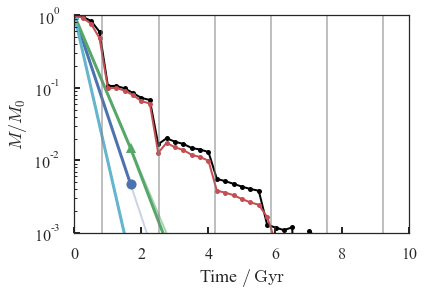

In [315]:
plot_total_mass_loss(pmmag=0.05)

Scale radius = 0.725
Softening = 0.05157150081844565
[ 65.19547321 119.69600718  51.66028503 -82.62837589   9.90109634
  67.2656748 ]
Tidal radius =  10.3447574722
Time unit:  0.17218607998280486
Mass fraction inside r_s =  0.074985230038916
400000.0
Velocity dispersion =  12.65981047816871
0.173821208772


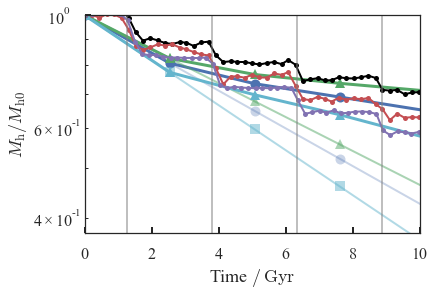

In [243]:
plot_inner_mass_loss(pmmag=0.25)

Scale radius = 1.45
Softening = 0.0515715008184
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.178011600004
Mass fraction inside r_s =  0.200614283292
400000.0
Velocity dispersion =  14.1169124371
0.17958097576
Scale radius = 1.45
Softening = 0.0515715008184
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.178011600004
Mass fraction inside r_s =  0.200614283292
400000.0
Velocity dispersion =  14.1169124371
0.17958097576
Scale radius = 1.45
Softening = 0.0515715008184
[-102.3714935   -46.16622771   67.61404953    4.58179312  -36.16510952
  -26.53893727]
Tidal radius =  9.28130148139
Time unit:  0.17742722462
Mass fraction inside r_s =  0.199299294591
400000.0
Velocity dispersion =  14.1182599602
0.178706332835
Scale radius = 1.45
Softening = 0.0515715008184
[-102.3714935   -46.16622771   67.61404953    4.58179312  -36.16510952
  -26.53

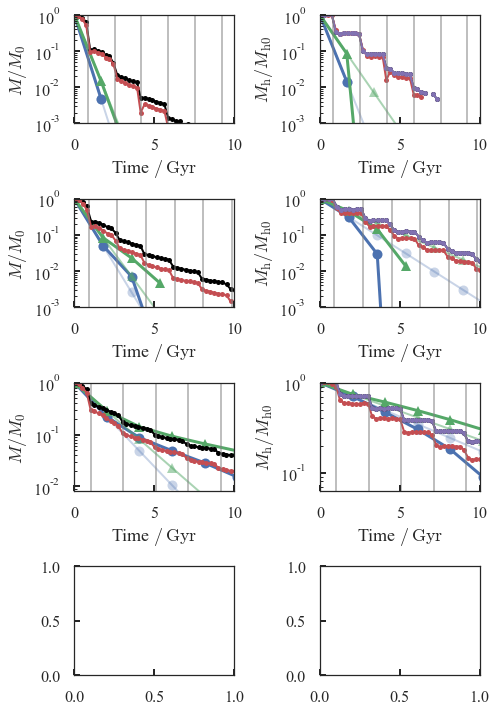

In [137]:
f,ax=plt.subplots(4,2,figsize=[7.,10.])
for i,pmmag in enumerate([0.05,0.1,0.17]):
    a=ax[i]
    plt.sca(a[0])
    plot_total_mass_loss(pmmag=pmmag,s=1.)
    plt.sca(a[1])
    plot_inner_mass_loss(pmmag=pmmag,s=1.)
    plt.tight_layout()

Scale radius = 0.725
Softening = 0.05157150081844565
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.1780116000044691
Mass fraction inside r_s =  0.08014496761643056
400000.0
Velocity dispersion =  12.656693252809594
0.17958097576
Scale radius = 0.725
Softening = 0.05157150081844565
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.17801160000446953
Mass fraction inside r_s =  0.08014496761643092
400000.0
Velocity dispersion =  12.656693252809594
0.17958097576
Scale radius = 0.725
Softening = 0.05157150081844565
[-102.3714935   -46.16622771   67.61404953    4.58179312  -36.16510952
  -26.53893727]
Tidal radius =  9.28130148139
Time unit:  0.1774272246199418
Mass fraction inside r_s =  0.07961963250501919
400000.0
Velocity dispersion =  12.657029553023646
0.178706332835
Scale radius = 0.725
Softening = 0.05157150081844565
[-102.3714935  

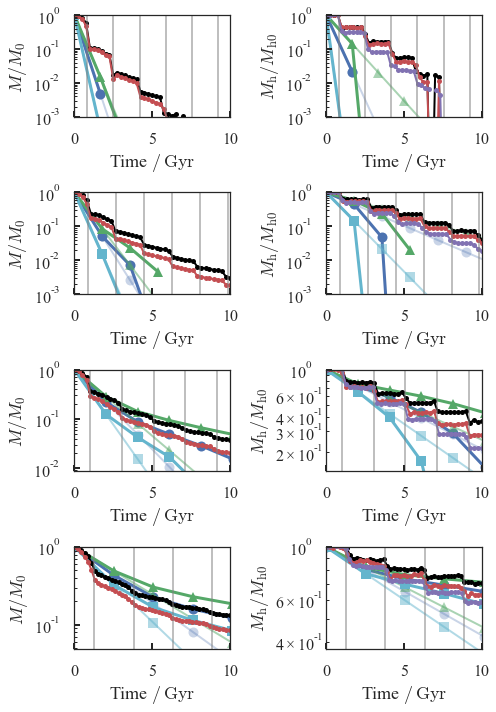

In [318]:
f,ax=plt.subplots(4,2,figsize=[7.,10.])
for i,pmmag in enumerate([0.05,0.1,0.17,0.25]):
    a=ax[i]
    plt.sca(a[0])
    plot_total_mass_loss(pmmag=pmmag)
    plt.sca(a[1])
    plot_inner_mass_loss(pmmag=pmmag)
    plt.tight_layout()
plt.savefig('mass_loss_profiles.pdf',bbox_inches='tight')

## Measure mass around apocentre and take ratios

In [36]:
s=2.
pmmag_list=[0.05,0.1,0.17,0.25,0.42]
mratios = np.zeros(5)
rapoperi = np.zeros(5)
for i,pmmag in enumerate(pmmag_list):
    flgg = (pmmag==0.42)*9+1
    data = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(s*flgg),int(pmmag*100.)))
    apo_masses = np.array([np.mean(data['mass_dm_core_init'].values[np.argsort(np.abs(data['times'].values-A))[:3]]) 
                           for A in apocentre_times(s=s,pmmag=pmmag)])
    rapoperi[i]=apo_peri_ratio(s=s,pmmag=pmmag,ca=1.)
    init_mass = np.mean(data['mass_dm_core_init'].values[:3])
    mass_ratio = np.concatenate((np.array([init_mass]),apo_masses[::-1]))
    MR = mass_ratio[1:]/mass_ratio[:-1]
    MR = MR[(~np.isinf(MR))&(MR>0.)&(mass_ratio[1:]>3e-2*data['mass_dm_core_init'][0])]
    mass_ratio = np.nanmean(MR)
    mratios[i]=mass_ratio
print mratios

Scale radius = 0.725
Softening = 0.05157150081844565
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.17801160000447022
Mass fraction inside r_s =  0.08014496761643151
400000.0
Velocity dispersion =  10.005994581240909
0.17958097576
Scale radius = 0.725
Softening = 0.05157150081844565
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.17801160000447108
Mass fraction inside r_s =  0.08014496761643229
400000.0
Velocity dispersion =  10.005994581240907
0.17958097576
Scale radius = 0.725
Softening = 0.05157150081844565
[-102.3714935   -46.16622771   67.61404953    4.58179312  -36.16510952
  -26.53893727]
Tidal radius =  9.28130148139
Time unit:  0.17742722461994223
Mass fraction inside r_s =  0.0796196325050196
400000.0
Velocity dispersion =  10.006260449904412
0.178706332835
Scale radius = 0.725
Softening = 0.05157150081844565
[-102.3714935 

In [8]:
def peri_step(t,peris,mratio):
    indx = np.argwhere(peris-t<=0.)
    if not len(indx):
        indx=-1
    else:
        indx = indx[-1][0]
    return np.power(mratio,indx+1)

Scale radius = 0.725
Softening = 0.05157150081844565
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.17801160000446972
Mass fraction inside r_s =  0.08014496761643106
400000.0
Velocity dispersion =  10.005994581240909
0.17958097576
Scale radius = 0.725
Softening = 0.05157150081844565
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.1780116000044708
Mass fraction inside r_s =  0.08014496761643204
400000.0
Velocity dispersion =  10.005994581240909
0.17958097576


[]

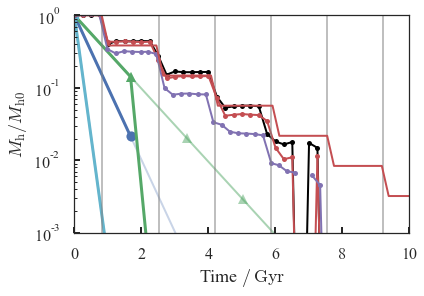

In [9]:
tt = np.linspace(0.,10.)
P = pericentre_times(pmmag=0.05)[::-1]
plot_inner_mass_loss(pmmag=0.05)
plt.plot(tt,[peri_step(t,P,mratios[0]) for t in tt])
plt.semilogy()

In [40]:
1.-mratios, np.exp(-0.42/0.11)

(array([0.61579341, 0.41199743, 0.17861721, 0.08750323, 0.04458961]),
 0.02196770588943551)

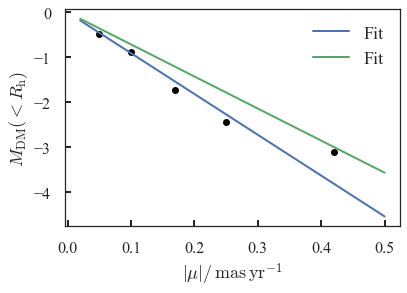

In [15]:
HPP = np.linspace(0.01,0.3,30)
# Mh = [single_mass_loss_hayashi(pp) for pp in HPP]
# plt.plot(HPP, Mh,label='Hayashi')
plt.plot(pmmag_list,np.log(1.-mratios),'.',color='k')
xx = np.linspace(0.02,0.5)
plt.plot(xx,np.log(1.-(1.-np.exp(-xx/0.11))),label='Fit')
plt.plot(xx,np.log(1.-(1.-np.exp(-xx/0.14))),label='Fit')
# plt.semilogy()
# plt.ylim(0.01,1.)
# plt.semilogy()
plt.ylabel(r'$M_\mathrm{DM}(<R_\mathrm{h})$')
plt.xlabel(r'$|\mu|/\,\mathrm{mas\,yr}^{-1}$')
plt.legend()

In [41]:
from scipy.optimize import minimize
def fitt(x,y):
    def yy(p):
        return np.sum((y-1./(1.+(x/p[0])**p[1]))**2)
    return minimize(yy,[13.,2.]).x

[16.1015858   1.28746505]


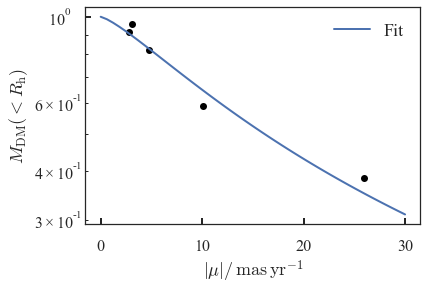

In [42]:
HPP = np.linspace(0.01,0.3,30)
plt.plot(rapoperi,mratios,'.',color='k')
xx = np.linspace(0.0,30.)
ff = fitt(rapoperi,mratios)
plt.plot(xx,1./(1.+(xx/ff[0])**ff[1]),label='Fit')
plt.semilogy()
plt.ylabel(r'$M_\mathrm{DM}(<R_\mathrm{h})$')
plt.xlabel(r'$|\mu|/\,\mathrm{mas\,yr}^{-1}$')
plt.legend()
print ff

In [18]:
s=1.
pmmag_list=[0.05,0.1,0.17,0.25]
mratios = np.zeros(4)
rapoperi = np.zeros(4)
for i,pmmag in enumerate(pmmag_list):
    data = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(s),int(pmmag*100.)))
    apo_masses = np.array([np.mean(data['mass_dm_core_init'].values[np.argsort(np.abs(data['times'].values-A))[:3]]) 
                           for A in apocentre_times(s=s,pmmag=pmmag)])
    rapoperi[i]=apo_peri_ratio(s=s,pmmag=pmmag,ca=1.)
    init_mass = np.mean(data['mass_dm_core_init'].values[:3])
    mass_ratio = np.concatenate((np.array([init_mass]),apo_masses[::-1]))
    MR = mass_ratio[1:]/mass_ratio[:-1]
    MR = MR[(~np.isinf(MR))&(MR>0.)&(mass_ratio[1:]>3e-2*data['mass_dm_core_init'][0])]
    mass_ratio = np.nanmean(MR)
    mratios[i]=mass_ratio
print mratios

Scale radius = 1.45
Softening = 0.05157150081844565
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.17801160000447092
Mass fraction inside r_s =  0.20061428329239095
400000.0
Velocity dispersion =  11.160399207581547
0.17958097576
Scale radius = 1.45
Softening = 0.05157150081844565
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.17801160000447006
Mass fraction inside r_s =  0.200614283292389
400000.0
Velocity dispersion =  11.160399207581548
0.17958097576
Scale radius = 1.45
Softening = 0.05157150081844565
[-102.3714935   -46.16622771   67.61404953    4.58179312  -36.16510952
  -26.53893727]
Tidal radius =  9.28130148139
Time unit:  0.17742722461994234
Mass fraction inside r_s =  0.19929929459130707
400000.0
Velocity dispersion =  11.161464518143271
0.178706332835
Scale radius = 1.45
Softening = 0.05157150081844565
[-102.3714935   -46

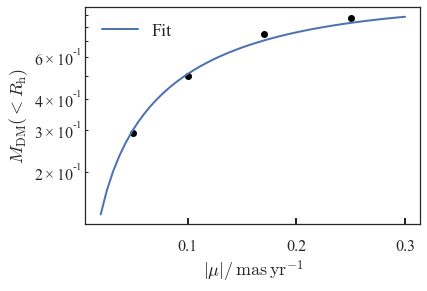

In [19]:
HPP = np.linspace(0.01,0.3,30)
# Mh = [single_mass_loss_hayashi(pp) for pp in HPP]
# plt.plot(HPP, Mh,label='Hayashi')
plt.plot(pmmag_list,mratios,'.',color='k')
xx = np.linspace(0.02,0.3)
# plt.plot(xx,(1.-np.exp(-xx/0.11)),label='Fit')
plt.plot(xx,(1.-np.exp(-xx/0.14)),label='Fit')
plt.semilogy()
# plt.ylim(0.01,1.)
# plt.semilogy()
plt.ylabel(r'$M_\mathrm{DM}(<R_\mathrm{h})$')
plt.xlabel(r'$|\mu|/\,\mathrm{mas\,yr}^{-1}$')
plt.legend()

[11.33721453  1.23175669]


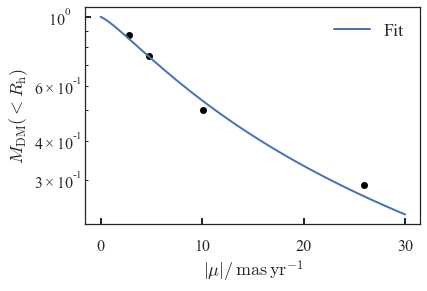

In [20]:
HPP = np.linspace(0.01,0.3,30)
plt.plot(rapoperi,mratios,'.',color='k')
xx = np.linspace(0.0,30.)
ff = fitt(rapoperi,mratios)
plt.plot(xx,1./(1.+(xx/ff[0])**ff[1]),label='Fit')
plt.semilogy()
plt.ylabel(r'$M_\mathrm{DM}(<R_\mathrm{h})$')
plt.xlabel(r'$|\mu|/\,\mathrm{mas\,yr}^{-1}$')
plt.legend()
print ff

In [26]:
s=0.5
pmmag_list=[0.05,0.1,0.17,0.25]
mratios = np.zeros(4)
rapoperi = np.zeros(4)
for i,pmmag in enumerate(pmmag_list):
    data = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%02d_PM_%i_ca_10_properties.csv'%(int(10.*s),int(pmmag*100.)))
    apo_masses = np.array([np.mean(data['mass_dm_core_init'].values[np.argsort(np.abs(data['times'].values-A))[:3]]) 
                           for A in apocentre_times(s=s,pmmag=pmmag)])
    rapoperi[i]=apo_peri_ratio(s=s,pmmag=pmmag,ca=1.)
    init_mass = np.mean(data['mass_dm_core_init'].values[:3])
    mass_ratio = np.concatenate((np.array([init_mass]),apo_masses[::-1]))
    MR = mass_ratio[1:]/mass_ratio[:-1]
    MR = MR[(~np.isinf(MR))&(MR>0.)&(mass_ratio[1:]>3e-2*data['mass_dm_core_init'][0])]
    mass_ratio = np.nanmean(MR)
    mratios[i]=mass_ratio
print mratios

Scale radius = 2.9
Softening = 0.05157150081844565
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.17801160000447022
Mass fraction inside r_s =  0.41829387867282314
400000.0
Velocity dispersion =  11.280805408212403
0.17958097576
Scale radius = 2.9
Softening = 0.05157150081844565
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.17801160000447108
Mass fraction inside r_s =  0.41829387867282725
400000.0
Velocity dispersion =  11.2808054082124
0.17958097576
Scale radius = 2.9
Softening = 0.05157150081844565
[-102.3714935   -46.16622771   67.61404953    4.58179312  -36.16510952
  -26.53893727]
Tidal radius =  9.28130148139
Time unit:  0.17742722461994223
Mass fraction inside r_s =  0.41555204137609864
400000.0
Velocity dispersion =  11.284423096297138
0.178706332835
Scale radius = 2.9
Softening = 0.05157150081844565
[-102.3714935   -46.166

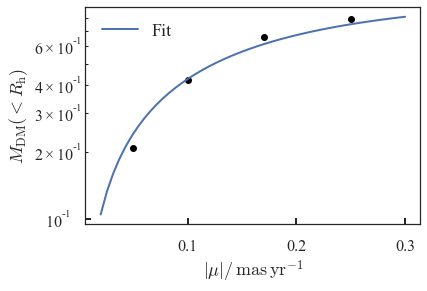

In [34]:
HPP = np.linspace(0.01,0.3,30)
plt.plot(pmmag_list,mratios,'.',color='k')
xx = np.linspace(0.02,0.3)
plt.plot(xx,(1.-np.exp(-xx/0.18)),label='Fit')
plt.semilogy()
plt.ylabel(r'$M_\mathrm{DM}(<R_\mathrm{h})$')
plt.xlabel(r'$|\mu|/\,\mathrm{mas\,yr}^{-1}$')
plt.legend()